In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns', None)
import statsmodels.api as sm

In [3]:
df = pd.read_csv('nhanes_2015_2016.csv')

df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [4]:
#Isolate variables of interest
vars = ['BPXSY1', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH1', 'DMDEDUC2', 'BMXBMI', 'SMQ020']
da = df[vars].dropna()

### Linear model for systollic blood pressure with age as predictor

In [5]:
model = sm.OLS.from_formula('BPXSY1 ~ RIDAGEYR', data = da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     1333.
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          2.09e-259
Time:                        15:33:30   Log-Likelihood:                -21530.
No. Observations:                5102   AIC:                         4.306e+04
Df Residuals:                    5100   BIC:                         4.308e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.0935      0.685    149.120      0.000     100.751     103.436
RIDAGEYR       0.4759      0.013     36.504      0.000       0.450       0.501
==============================================================================
Omnibus:                      690.261   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1505.999
Skew:                           0.810   Prob(JB):                         0.00
Kurtosis:                       5.112   Cond. No.                         156.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value is very small, making it a significant departure from the null hypothesis (assuming a sig. level of 5%). Our coefficient tells us that for every year we add our SBP will go up, in average, 0.48 units.

In [6]:
#Standard deviation of our values
da.BPXSY1.std()

18.486559500781865

The standard deviation of our dependent variable is big, indicating a significant difference in SBP bewteen populations. But this makes sense since the linear coefficient is additive, so it'll stack up more the more years we add.

In [7]:
#R-squared of our fit
cc = da[['BPXSY1', 'RIDAGEYR']].corr()
print(cc.BPXSY1.RIDAGEYR**2)

0.2071545962518702


The value of our $R^2$ is a bit small which means it's weak, since only about 21% of our data is explained by the linear correlation. But this is fine, it's good enough to establish a link between the two.

### Linear model for systollic blood pressure with age and gender as predictor

In [8]:
#Relabeling the gender column
da['RIAGENDRx'] = da['RIAGENDR'].replace({1:'Male', 2:'Female'})

In [9]:
model = sm.OLS.from_formula('BPXSY1 ~ RIDAGEYR + RIAGENDRx', data = da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     697.4
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          1.87e-268
Time:                        15:33:30   Log-Likelihood:                -21505.
No. Observations:                5102   AIC:                         4.302e+04
Df Residuals:                    5099   BIC:                         4.304e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           100.6305      0.712    141.257      0.000      99.234     102.027
RIAGENDRx[T.Male]     3.2322      0.459      7.040      0.000       2.332       4.132
RIDAGEYR              0.4739      0.013     36.518      0.000       0.448       0.499
==============================================================================
Omnibus:                      706.732   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1582.730
Skew:                           0.818   Prob(JB):                         0.00
Kurtosis:                       5.184   Cond. No.                         168.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What the added gender predictor tells us is that, on average and assuming the same age, men will tend to have 3.23 more SBP units that women.

In [10]:
#R-squared
cc = np.corrcoef(da.BPXSY1, result.fittedvalues)
print(cc[0,1]**2)

0.214785810862437


### Linear model for systollic blood pressure with age, BMI and gender as predictor

In [11]:
model = sm.OLS.from_formula('BPXSY1 ~ RIDAGEYR + RIAGENDRx + BMXBMI', data = da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     502.0
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          8.54e-286
Time:                        15:33:30   Log-Likelihood:                -21461.
No. Observations:                5102   AIC:                         4.293e+04
Df Residuals:                    5098   BIC:                         4.296e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            91.5840      1.198     76.456      0.000      89.236      93.932
RIAGENDRx[T.Male]     3.5783      0.457      7.833      0.000       2.683       4.474
RIDAGEYR              0.4709      0.013     36.582      0.000       0.446       0.496
BMXBMI                0.3060      0.033      9.351      0.000       0.242       0.370
==============================================================================
Omnibus:                      752.325   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1776.087
Skew:                           0.847   Prob(JB):                         0.00
Kurtosis:                       5.343   Cond. No.                         316.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The value of the gender coefficient changed with the intrduction of BMI, telling us there's some connection (albeit small) between the two, and the \$R^2$ value increased by a several units which makes this set up the most robust of the three. 

### Visualization of the fitted models

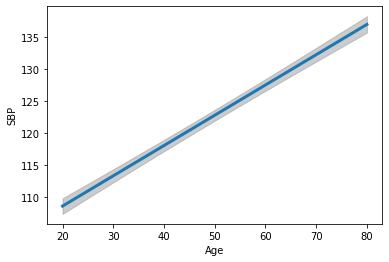

In [12]:
from statsmodels.sandbox.predict_functional import predict_functional 

#We need to fix all variables except for the independent and focus variables 
#Although we don't actually need all the variables, if we don't fix them a warning will pop up

#Here we fix for females with a BMI of 25 to visualize how their SBP might change with age
values = {'RIAGENDRx': 'Female', 'RIAGENDR': 1, 'BMXBMI': 25, 
         'DMDEDUC2': 1, 'RIDRETH1': 1, 'SMQ020': 1}

# pr = the values predicted by the fitted model for the above profile across the range of RIDAGEYR values
# cb = the confidence band interval across the range of RIDAGEYR values
# fv = the range of RIDAGEYR values used to generate the pr and cb values.
pr, cb, fv = predict_functional(result, 'RIDAGEYR',
                               values = values, ci_method = 'simultaneous')

ax = sns.lineplot(x = fv, y = pr, lw = 3)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color = 'gray', alpha = 0.4)
ax.set_xlabel('Age')
_ = ax.set_ylabel('SBP')

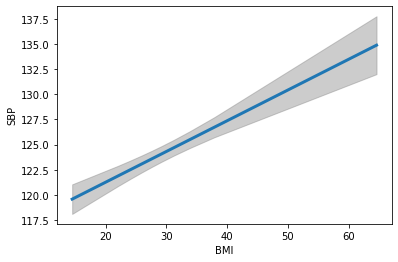

In [13]:
#Now we fix for females with age 50 to visualize how their SBP changes as their BMI increases
del values['BMXBMI']
values['RIDAGEYR'] = 50

pr, cb, fv = predict_functional(result, 'BMXBMI',
                               values = values, ci_method = 'simultaneous')

ax = sns.lineplot(x = fv, y = pr, lw = 3)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color = 'gray', alpha = 0.4)
ax.set_xlabel('BMI')
_ = ax.set_ylabel('SBP')

#We see that the error bands are wider, meaning that there's less certainity about the relationship 
#between BMI and SBP when compared with age

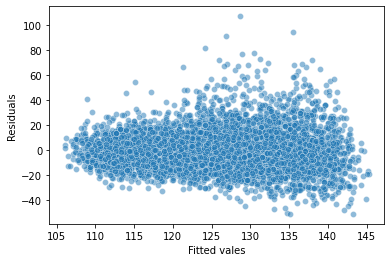

In [14]:
#We can now make plot the residuals against the fitted values to evaluate variance of the population
pp = sns.scatterplot(x = result.fittedvalues, y = result.resid, alpha = 0.5)
pp.set_xlabel('Fitted vales')
_ = pp.set_ylabel('Residuals')

As we can see, our data has a weak increasing mean/variance relationship, that is, as values of SBP get bigger so too will the variance. 

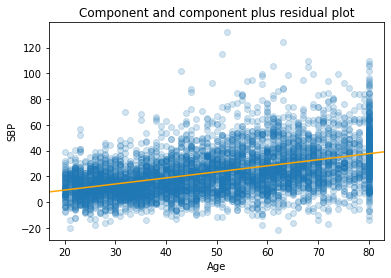

In [15]:
#We can also do a residual vs fitted values plot with a focus variable. 
#By fixing all but one variable, we can study the variance due to said unfixed variable
#(and the variace unexplained by any of the covariates)
from statsmodels.graphics.regressionplots import plot_ccpr

#Let's see what happens if we fix all variables except for age
ax = plt.axes()
plot_ccpr(result, 'RIDAGEYR', ax)
ax.set_xlabel('Age')
_ = ax.set_ylabel('SBP')
ax.lines[0].set_alpha(0.2)
_ = ax.lines[1].set_color('orange')

This plot implies that when BMI and gender are held fixed, the average blood pressures of an 80 and 18 year old differ by around 30 mm/Hg. This plot also shows, as discussed above, that the deviations from the mean are somewhat smaller at the low end of the range compared to the high end of the range. We also see that at the high end of the range, the deviations from the mean are somewhat right-skewed, with exceptionally high SBP values being more common than exceptionally low SBP values.

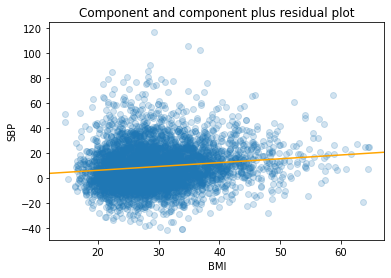

In [16]:
#Let's do the same but leaving only BMI unfixed this time
ax = plt.axes()
plot_ccpr(result, 'BMXBMI', ax)
ax.set_xlabel('BMI')
_ = ax.set_ylabel('SBP')
ax.lines[0].set_alpha(0.2)
_ = ax.lines[1].set_color('orange')

There is a lot more scatter and less uniformity compared to age, thus there seems to be less information about SBP in BMI, although a trend (if weak) certainly exists.

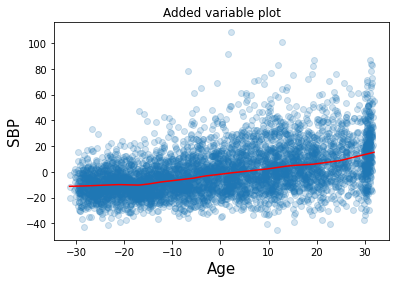

In [17]:
#We can also do an added variable plot to reveal any non-linearities between one variable and the outcome
from statsmodels.graphics.regressionplots import add_lowess

#We need to use generalized linear models (as opossed to ordinary least squares for linear models) for this
model = sm.GLM.from_formula("BPXSY1 ~ RIDAGEYR + BMXBMI + RIAGENDRx", data=da)
result = model.fit()
result.summary()

#The variable we'll study for non-linearity will be age
fig = result.plot_added_variable("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)
ax.set_xlabel('Age')
_ = ax.set_ylabel('SBP')

As we can see from the plot, there a hint that the shape is slightly flatter for the first 15 years or so of age. This would imply that blood pressure increases slightly more slowly for people in their 20s and early 30s, then begins increasing faster after that point.

### Logistic model for longtime smokers with gender as covariate

In [18]:
#We'll code smoker as 1 and non-smoker as 0
da['smq'] = da.SMQ020.replace({1:1, 2:0, 7: np.nan, 9: np.nan}).dropna()

In [19]:
#Calculate odds with the percentage of smokers in the population
c = pd.crosstab(da.RIAGENDRx, da.smq).apply(lambda x: x/x.sum(), axis = 1)
c['odds'] = c.loc[:, 1]/c.loc[:, 0]
c

smq,0.0,1.0,odds
RIAGENDRx,,,
Female,0.680197,0.319803,0.470162
Male,0.467453,0.532547,1.139252


It seems women smoke less compared to men (32% vs 53%), and so the odds of a man being a smoker will be higher than women (1.14 vs 0.47).

In [20]:
#Odd ratio of males and female smokers
c.odds.Male/c.odds.Female

2.423105552613186

This means that a man, on average, is 2.42 times more likely to be a smoker than a woman. But since the distribution of odd statistics is not symmetric (if men were 2 times as likely to smoke, the equivalent odds for women would be 1/2), we'll do a log odds transformation to make it symmetric.

In [21]:
c['log_odds'] = np.log(c.odds)
c

smq,0.0,1.0,odds,log_odds
RIAGENDRx,,,,
Female,0.680197,0.319803,0.470162,-0.754679
Male,0.467453,0.532547,1.139252,0.130371


The log odds transformation is centered around zero, which is to be interpreted as something having a 50% chance of happening. So -0.75 for women means that their percentage of smokers is way below 50%, while male percentages are slightly above 50% since their log odds is 1.14.

In [22]:
#To make a logistic regression we need to use generalized linear models
model = sm.GLM.from_formula('smq ~ RIAGENDRx', family = sm.families.Binomial(), data = da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    smq   No. Observations:                 5094
Model:                            GLM   Df Residuals:                     5092
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3350.6
Date:                Mon, 07 Mar 2022   Deviance:                       6701.2
Time:                        15:33:38   Pearson chi2:                 5.09e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.7547      0.042    -18.071      0.000      -0.837      -0.673
RIAGENDRx[T.Male]     0.8851      0.058     15.227      0.000       0.771       0.999
=====================================================================================
"""

The coefficient for males (with females being the reference variable) is the result of the difference between the log odds of men and women. This log odds-logistic regression relation always holds for models with a single binary coviariate

In [23]:
#difference of log odds
c.log_odds.Male - c.log_odds.Female

0.8850500036644218

### Logistic model for longtime smokers with gender and age as coviarates

In [26]:
model = sm.GLM.from_formula('smq ~ RIAGENDRx + RIDAGEYR', family = sm.families.Binomial(), data = da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    smq   No. Observations:                 5094
Model:                            GLM   Df Residuals:                     5091
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3296.6
Date:                Mon, 07 Mar 2022   Deviance:                       6593.2
Time:                        15:35:14   Pearson chi2:                 5.10e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.6166      0.095    -16.985      0.000      -1.803      -1.430
RIAGENDRx[T.Male]     0.8920      0.059     15.170      0.000       0.777       1.007
RIDAGEYR              0.0172      0.002     10.289      0.000       0.014       0.021
=====================================================================================
"""

Notice that the coefficient fot gender increased slightly. The age coefficient suggests that although older people have a bigger chance of being longtime smokers, with the log odds increasing by 0.017 (= odds of 1.017) with every year added, this is very minimal.

### Logistic model for longtime smokers with gender, age and education as coviarates

In [27]:
da['DMDEDUC2x'] = da.DMDEDUC2.replace({1: "lt9", 2: "x9_11", 3: "HS", 4: "SomeCollege",
                                       5: "College", 7: np.nan, 9: np.nan})

model = sm.GLM.from_formula('smq ~ RIAGENDRx + RIDAGEYR + DMDEDUC2x', family = sm.families.Binomial(), data = da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    smq   No. Observations:                 5093
Model:                            GLM   Df Residuals:                     5086
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3201.2
Date:                Mon, 07 Mar 2022   Deviance:                       6402.4
Time:                        16:08:20   Pearson chi2:                 5.10e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -2.3060      0.114    -20.174      0.000      -2.530      -2.082
RIAGENDRx[T.Male]            0.9096      0.060     15.118      0.000       0.792       1.028
DMDEDUC2x[T.HS]              0.9434      0.090     10.521      0.000       0.768       1.119
DMDEDUC2x[T.SomeCollege]     0.8322      0.084      9.865      0.000       0.667       0.998
DMDEDUC2x[T.lt9]             0.2662      0.109      2.438      0.015       0.052       0.480
DMDEDUC2x[T.x9_11]           1.0986      0.107     10.296      0.000       0.889       1.308
RIDAGEYR                     0.0183      0.002     10.582      0.000       0.015       0.022
============================================================================================
"""

Since the intercept accounts for females and college educated people, our two reference variables, this can be read as telling us women who went to college are very unlikely to be smokers.

### Visualization of the fitted models for logistic regression

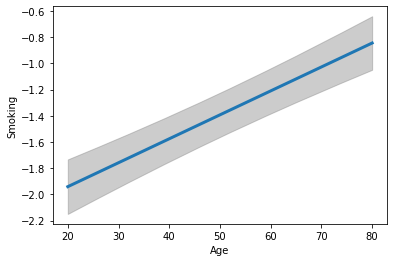

In [29]:
#Plot of fitted log odds (or logit) probability for the smoking outcome as a function of age

values = {"RIAGENDRx": "Female", "RIAGENDR": 1, "BMXBMI": 25,
          "DMDEDUC2": 1, "RIDRETH1": 1, "SMQ020": 1,
          "DMDEDUC2x": "College", "BPXSY1": 120} 

pr, cb, fv = predict_functional(result, 'RIDAGEYR', values = values,
                               ci_method = 'simultaneous')

ax = sns.lineplot(x = fv, y = pr, lw = 3)
ax.fill_between(fv, cb[:, 0], cb[:, 1],color = 'grey', alpha = 0.4)
ax.set_xlabel('Age')
_ = ax.set_ylabel('Smoking')

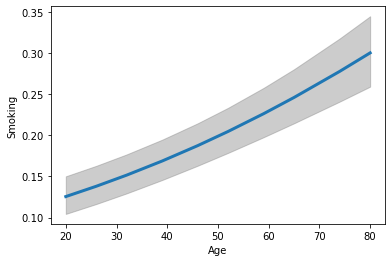

In [31]:
#Same model but displaying probabilities instead of log odds

pr1 = 1/(1 + np.exp(-pr))
cb1 = 1/(1 + np.exp(-cb))

ax = sns.lineplot(x = fv, y = pr1, lw = 3)
ax.fill_between(fv, cb1[:, 0], cb1[:, 1], color = 'grey', alpha = 0.4)
ax.set_xlabel('Age')
_ = ax.set_ylabel('Smoking')

Note that while the age and log odds are linearly related, age has a curved relationship with probability. This is necessary since probabilities must remain between 0 and 1, a linear relationship would eventually exit this interval.

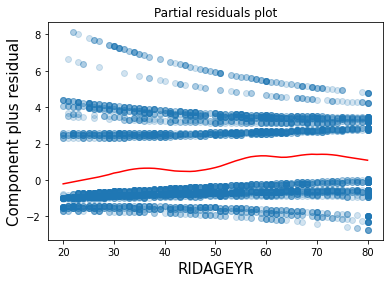

In [34]:
#Partial residual plot

fig = result.plot_partial_residuals('RIDAGEYR')
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)

_ = add_lowess(ax)

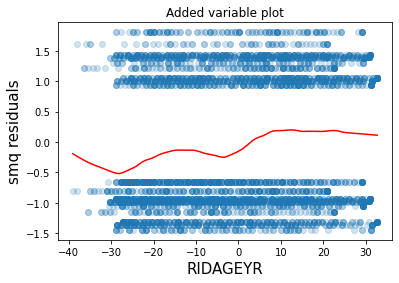

In [38]:
#Added variable plot

fig = result.plot_added_variable('RIDAGEYR')
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

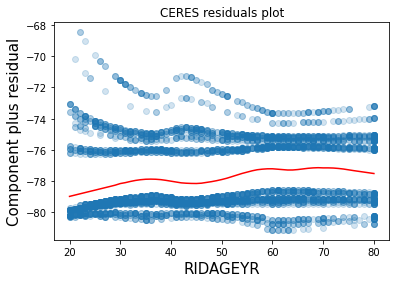

In [40]:
#CERES residual plot 

fig = result.plot_ceres_residuals('RIDAGEYR')
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

Taken at face value, the plots below suggest that smoking rates may rise slightly faster for people between the ages of 20 and 35, and again for people between the ages of 50 and 60, with a period of minimal increase between these age intervals. This would contradict the perfectly linear model for age (on the log odds scale) that we have specified in our model. These plotting techniques can be useful at identifying possible opportunities for future analysis with additional data, but do not identify features that can be claimed with high confidence using the present data.